In [123]:
import random
from datetime import date, datetime, timedelta
import names
import time
import matplotlib.pyplot as plt

In [124]:
class HashTable:
    def __init__(self, hash_fn, capacity=1009):
        self.hf = hash_fn
        self._capacity = capacity
        self._buckets = [[] for _ in range(self._capacity)]
        self._count = 0
        self.collisions = 0

    def my_hash_fn(key: tuple):
        """
        Compute a hash code for a 10-digit string.
        Raises ValueError if key isn’t exactly 10 digits.
        """
        if len(key) != 10 or not key.isdigit():
            raise ValueError("Key must be a 10-digit string of digits only")
        h = 0
        for ch in key:
            # map '0'–'9' to 0–9, then roll
            h = (31 * h + (ord(ch) - ord('0'))) & 0xFFFFFFFF
        return h
    
    def _hash(self, key: str):
        raw = self.hf(key)
        return raw % self._capacity
    
    def size(self):
        return self._count
    
    def put(self, key: str, value: tuple):
        idx = self._hash(key)
        bucket = self._buckets[idx]
        for i, (k, _) in enumerate(bucket):
            if k == key:
                bucket[i] = (key, value)
                return
            self.collisions += 1
        bucket.append((key, value))
        self._count += 1
    
    def get(self, key: str):
        idx = self._hash(key)
        bucket = self._buckets[idx]
        for (k, v) in bucket:
            if k == key:
                return v
            self.collisions += 1
        raise KeyError(f"Key not found: {key}")
    
    def probe(self, key: str) -> bool:
        idx = self._hash(key)
        return any(k == key for (k, _) in self._buckets[idx])
    
    def delete(self, key: str):
        idx = self._hash(key)
        bucket = self._buckets[idx]
        for i, (k, _) in enumerate(bucket):
            if k == key:
                del bucket[i]
                self._count -= 1
                return
            self.collisions += 1
        raise KeyError(f"Key not found: {key}")
    
    def all_keys(self):
        return [k for bucket in self._buckets for (k, _) in bucket]
    
def my_hash_fn(key: tuple):
        """
        Compute a hash code for a 10-digit string.
        Raises ValueError if key isn’t exactly 10 digits.
        """
        if len(key) != 10 or not key.isdigit():
            raise ValueError("Key must be a 10-digit string of digits only")
        h = 0
        for ch in key:
            # map '0'–'9' to 0–9, then roll
            h = (31 * h + (ord(ch) - ord('0'))) & 0xFFFFFFFF
        return h

In [125]:
def generate_random_10_digit_number():
  return ''.join(random.choice('0123456789') for _ in range(10))

def generate_random_date(min_year = 1900, max_year = datetime.now().year):
  start = date(min_year, 1, 1)
  years = max_year - min_year + 1
  end = start + timedelta(days=365 * years)
  return start + (end - start) * random.random()

def randomKeyValuePairs(n: int):
  result = [None] * n
  for i in range(n):
    key = generate_random_10_digit_number()
    DOB = generate_random_date()
    name = names.get_full_name()
    result[i] = (key, (name, DOB))
  return result

def tableFromList(size, items):
  hashTable = HashTable(my_hash_fn)
  for i in range(size):
    hashTable.put(items[i][0], items[i][1])
  return hashTable

    


In [126]:
def retrieveManyPairs(hashTable, retrievals=1000):
    keys = hashTable.all_keys()
    start = time.time()
    for _ in range(retrievals):
        hashTable.get(random.choice(keys))
    end = time.time()
    return end - start


In [127]:
# collecting data
numOfTests = 50
values = randomKeyValuePairs((numOfTests) * 1000)
tableSizes = [None] * numOfTests
collisions = [None] * numOfTests
times = [None] * numOfTests

for i in range(0, numOfTests):
    myHashTable = tableFromList((i+1) * 1000, values)
    tableSizes[i] = myHashTable.size()
    collisions[i] = myHashTable.collisions
    times[i] = retrieveManyPairs(myHashTable)

In [128]:
myHashTable.size()

50000

Text(0.5, 1.0, 'Collisions/Retrieval Time Ratio in Chained Hashmap')

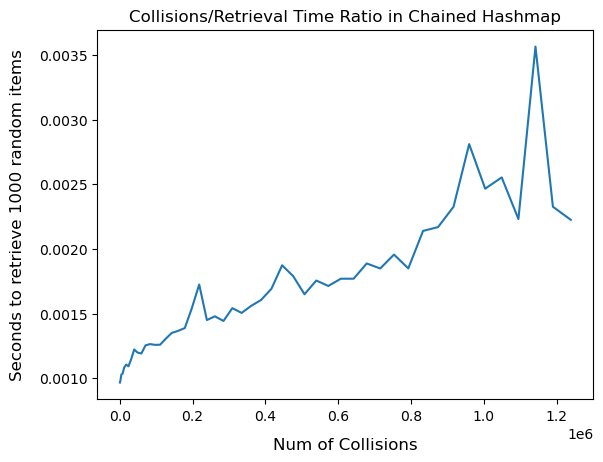

In [129]:
plt.plot(collisions, times)
plt.xlabel("Num of Collisions", fontsize=12, labelpad=10)
plt.ylabel("Seconds to retrieve 1000 random items", fontsize=12, labelpad=10)
plt.title("Collisions/Retrieval Time Ratio in Chained Hashmap")

Based on the graph, the time required to retrieve 1000 items is proportionate to the number of collisions in the hashmap (with some variation, likely due to the random selection of keys in the retrieval, where some keys are share more hash codes than others). This makes sense, as more total collisions mean that more keys are hashing to the same index in the hash table, and retrieving a value that shares the same index as other hashes requires looping through the items at that index until the value with the matching key is found. 

In [136]:
class HashTable:
    def __init__(self, hash_fn=my_hash_fn, capacity=1009):
        self.hf = hash_fn
        self._capacity = capacity
        self._buckets = [()] * self._capacity
        self._count = 0
        self.collisions = 0
        self.collisions_removed = 0

    def my_hash_fn(key: tuple):
        """
        Compute a hash code for a 10-digit string.
        Raises ValueError if key isn’t exactly 10 digits.
        """
        if len(key) != 10 or not key.isdigit():
            raise ValueError("Key must be a 10-digit string of digits only")
        h = 0
        for ch in key:
            # map '0'–'9' to 0–9, then roll
            h = (31 * h + (ord(ch) - ord('0'))) & 0xFFFFFFFF
        return h
    
    def _hash(self, key: str):
        raw = self.hf(key)
        return raw % self._capacity
    
    def size(self):
        return self._count
    
    def put(self, key: str, value: tuple):
        idx = self._hash(key)
        while self._buckets[idx] != ():
            if self._buckets[idx][0] == key:
                self._buckets[idx][1] = value
                return
            self.collisions+= 1
            idx = (idx + 1) % self._capacity
            if(idx == self._hash(key)):
                self.reset(key, value, self._capacity * 2)
                return
                
            
        self._buckets[idx] = (key, value)
        self._count += 1
    
    def reset(self, key, value, capacity):
        buckets = self._buckets
        collisions_removed = self.collisions
        self.__init__(hash_fn=self.hf, capacity=capacity)
        self.collisions_removed = collisions_removed
        for item in buckets:
            if item != ():
                self.put(item[0], item[1])
        self.put(key, value)
        self._count += 1

    def get(self, key: str):
        idx = self._hash(key)
        bucket = self._buckets[idx]
        while bucket != ():
            if bucket[0] == key:
                return bucket[1]
            self.collisions += 1
            idx = (idx + 1) % self._capacity
            bucket = self._buckets[idx]
        raise KeyError(f"Key not found: {key}")
    
    def probe(self, key: str) -> bool:
        idx = self._hash(key)
        return any(k == key for (k, _) in self._buckets[idx:])
    
    def delete(self, key: str):
        idx = self._hash(key)
        bucket = self._buckets[idx]
        while bucket != ():
            if bucket[0] == key:
                self._delete_at_idx(idx)
                return
            idx = (idx + 1) % self._capacity
            bucket = self._buckets[idx]
        raise KeyError(f"Key not found: {key}")
    

    def _delete_at_idx(self, idx: int):
        self._buckets[idx] = ()
        idx = (idx + 1) % self._capacity
        following_items = []
        while self._buckets[idx] != ():
            following_items.append(self._buckets[idx])
            self._buckets[idx] = ()
            idx = (idx + 1) % self._capacity
        for item in following_items:
            self.put(item[0], item[1])
        
        return
    
    def all_keys(self):
        keys = []
        for item in self._buckets:
            if item != ():
                keys.append(item[0])
        return keys


In [137]:
# collecting data
numOfTests = 50
values = randomKeyValuePairs((numOfTests) * 1000)
tableSizes = [None] * numOfTests
total_collisions = [None] * numOfTests
current_collisions = [None] * numOfTests
times = [None] * numOfTests

for i in range(0, numOfTests):
    myHashTable = tableFromList((i+1) * 1000, values)
    tableSizes[i] = myHashTable.size()
    total_collisions[i] = myHashTable.collisions + myHashTable.collisions_removed
    current_collisions[i] = myHashTable.collisions
    times[i] = retrieveManyPairs(myHashTable)

Text(0.5, 1.0, 'Collisions/Retrieval Time Ratio in Probed Hashmap')

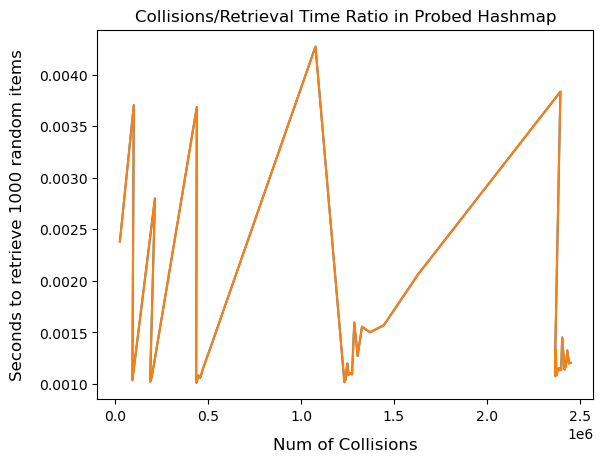

In [138]:
plt.plot(collisions, times)
plt.plot(collisions, times)
plt.xlabel("Num of Collisions", fontsize=12, labelpad=10)
plt.ylabel("Seconds to retrieve 1000 random items", fontsize=12, labelpad=10)
plt.title("Collisions/Retrieval Time Ratio in Probed Hashmap")

This graph is funky, and the written number of collisions are somewhat deceptive. In the probed graph, if a value is hashed to an index that already contains a value, the code will check to see if the following index is empty, and place the new value into that new index. If that index already contains a value, the code will check the next index, and so on (with the ability to loop back to the starting index), until the code locates an index with no value stored, placing the new value into that index. If no empty index can be found (i.e, the hash table is filled to capacity), the code will create a new empty hashmap that is double the capacity of the filled hashmap, and re-add all the old values + the new value to that new hashmap. The x axis is deceptive because the number of collisions do not reset when the capacity is increased, even though the number of collisions will cut in (about) half each time the capacity is doubled. This explains why the time required to retrieve 1000 random items oscilates between .004 and .001 seconds as the number of collisions increases. It takes the most time to retrieve an item from a list that is filled to capacity (a list of size 1009 * 2^n where n is any non-negative integer). When a list of size 1009 * 2^n where n is any non-negative integer gains one more item, the capacity of the hashmap doubles, and each item is rehashed to a new position in the list where it tends to share hashes with fewer items. This makes the time to retrieve that item shorter, explaining the decreasing spikes in the graph. To demonstrate this further, I will experiement with retrieving 1000 items from various hashmaps whose sizes differ from one another by 1. 

In [144]:
# collecting data
numOfTests = 4037
values = randomKeyValuePairs((numOfTests))
tableSizes = [None] * numOfTests
total_collisions = [None] * numOfTests
current_collisions = [None] * numOfTests
times = [None] * numOfTests

for i in range(0, numOfTests):
    myHashTable = tableFromList((i+1), values)
    tableSizes[i] = myHashTable.size()
    total_collisions[i] = myHashTable.collisions + myHashTable.collisions_removed
    current_collisions[i] = myHashTable.collisions
    times[i] = retrieveManyPairs(myHashTable)

Text(0.5, 1.0, 'Collisions/Retrieval Time Ratio in Probed Hashmap')

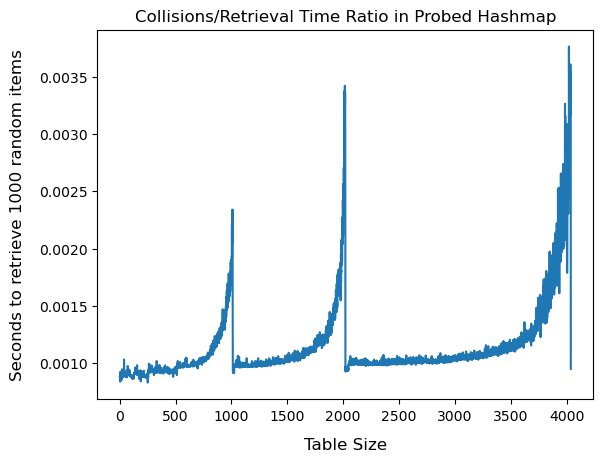

In [146]:
plt.plot(tableSizes, times)
plt.xlabel("Table Size", fontsize=12, labelpad=10)
plt.ylabel("Seconds to retrieve 1000 random items", fontsize=12, labelpad=10)
plt.title("Collisions/Retrieval Time Ratio in Probed Hashmap")

Now THIS is a sexy graph. This is the plot of how much time it takes to retrieve 1000 random values from hashmaps of sizes between 1 and 4037. You'll notice that the amount of time to retrieve 1000 items spikes when the hashmaps are of sizes 1009, 2018, and 4036. At this point, every index in the map is filled, so the code will have to search through each index (starting with the index that a value would be mapped to with no collisions), until the code locates a value whose key matches the desired key. This means that, worst case scenario, the code will loop through every single item stored in the map before it can find a matching key (this scenario occurs when each value maps to the same hash index). However, once the map is of size 1009 * 2^n + 1, (1010, 2019, 4037), the amount of time required to retrieve 1000 items drops to an almost constant time. This is because, once the size exceeds 1009* 2^n by 1, the capacity doubles and all values are re-added to the tree, substantially decreasing the amount of collisions. You'll notice that between sizes 1009 * 2^n + 1 and 1009 * 2^(n+1), the amount of time required to retrieve 1000 items increases faster and faster, because as the amount of items in the map approaches the list's capacity, each newly added item is more likely to collide with other items, increasing the amount of time it takes to retrieve any random item. 